In [1]:
# Data Wrangling
import pandas as pd

from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
%matplotlib inline
rc('font', family='malgun gothic')
import seaborn as sns
%matplotlib inline

# EDA

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from random import uniform
from scipy.stats import gmean
from scipy.stats import randint

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import ExtraTreesClassifier
# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.decomposition import PCA
import datetime

In [2]:
# Read Data
X = pd.read_csv('X.csv',)
y = pd.read_csv('y.csv')
test_na = pd.read_csv('test.csv')

In [3]:
# 데이터 타입 변환
X = X.astype('str')
test_na = test_na.astype('str')

X[['전체회차','현재회차','서비스일자','접수일','최초서비스일']] = X[['전체회차','현재회차','서비스일자','접수일','최초서비스일']].astype('int')
test_na[['전체회차','현재회차','서비스일자','접수일','최초서비스일']] = test_na[['전체회차','현재회차','서비스일자','접수일','최초서비스일']].astype('int')

## Modeling

In [4]:
X.columns

Index(['장기서비스여부', '기존고객여부', '결재형태', '서비스주소', '주거형태', 'endtime', 'starttime',
       'betweentime', 'ser_add_dae', 'ser_add_so', '접수월', '접수일일', '잔여회차',
       '종료여부', '고객가입일', '고객서비스월', '고객서비스일', '고객가입월', '고객가입일일', '평수', '반려동물',
       '우선청소', '부재중여부', '매니저성별', '매니저이동방법', '근무가능지역', '부재중서비스가능여부', '매니저생년월일',
       'CS교육이수여부', '청소교육이수여부', 'so_가능', 'dae_가능', '지역_가능', '부재중청소', '나이대',
       '전체회차', '현재회차', '서비스일자', '접수일', '최초서비스일', 'cus', 'man', 'cus_man'],
      dtype='object')

In [5]:
# 범주형 변수
cat_list = ['장기서비스여부', '기존고객여부', '서비스주소',  
       'betweentime', 'ser_add_dae', 'ser_add_so', 
       '종료여부', '고객가입일', '고객서비스월', 
       '우선청소', '부재중여부', '매니저이동방법', '근무가능지역', '부재중서비스가능여부', '매니저생년월일',
       'CS교육이수여부', '청소교육이수여부', 'so_가능', 'dae_가능', '지역_가능', '나이대',
       '전체회차','현재회차',"잔여회차", '서비스일자', '접수일', '최초서비스일', "cus","man",'cus_man']

In [6]:
# Validation
kfold = KFold(n_splits=5, shuffle = True, random_state=0)
answer = []

catf = CatBoostClassifier(cat_features=cat_list, random_state = 20182830)
scores = cross_val_score(catf , X[cat_list], y, cv=kfold, scoring='roc_auc')
answer.append(scores)
print(answer)

Learning rate set to 0.035734
0:	learn: 0.6612756	total: 169ms	remaining: 2m 48s
1:	learn: 0.6310206	total: 284ms	remaining: 2m 21s
2:	learn: 0.6043245	total: 328ms	remaining: 1m 49s
3:	learn: 0.5798281	total: 369ms	remaining: 1m 31s
4:	learn: 0.5569629	total: 466ms	remaining: 1m 32s
5:	learn: 0.5353638	total: 515ms	remaining: 1m 25s
6:	learn: 0.5167527	total: 544ms	remaining: 1m 17s
7:	learn: 0.4997439	total: 563ms	remaining: 1m 9s
8:	learn: 0.4841918	total: 579ms	remaining: 1m 3s
9:	learn: 0.4622513	total: 685ms	remaining: 1m 7s
10:	learn: 0.4449893	total: 722ms	remaining: 1m 4s
11:	learn: 0.4287338	total: 825ms	remaining: 1m 7s
12:	learn: 0.4185920	total: 876ms	remaining: 1m 6s
13:	learn: 0.3976553	total: 992ms	remaining: 1m 9s
14:	learn: 0.3895247	total: 1.01s	remaining: 1m 6s
15:	learn: 0.3820779	total: 1.03s	remaining: 1m 3s
16:	learn: 0.3752554	total: 1.06s	remaining: 1m 1s
17:	learn: 0.3595375	total: 1.2s	remaining: 1m 5s
18:	learn: 0.3428156	total: 1.35s	remaining: 1m 9s
19:	l

KeyboardInterrupt: 

In [7]:
# Fitting CatBoostClassifier
catf = CatBoostClassifier(cat_features=cat_list, random_state = 20182830)
catf.fit(X[cat_list], y)

Learning rate set to 0.039306
0:	learn: 0.6583847	total: 14ms	remaining: 13.9s
1:	learn: 0.6268193	total: 45.9ms	remaining: 22.9s
2:	learn: 0.5981826	total: 78.9ms	remaining: 26.2s
3:	learn: 0.5665153	total: 206ms	remaining: 51.4s
4:	learn: 0.5422802	total: 282ms	remaining: 56.2s
5:	learn: 0.5212836	total: 301ms	remaining: 49.9s
6:	learn: 0.5022563	total: 326ms	remaining: 46.3s
7:	learn: 0.4726702	total: 450ms	remaining: 55.9s
8:	learn: 0.4577826	total: 507ms	remaining: 55.8s
9:	learn: 0.4401373	total: 631ms	remaining: 1m 2s
10:	learn: 0.4250513	total: 749ms	remaining: 1m 7s
11:	learn: 0.4134420	total: 788ms	remaining: 1m 4s
12:	learn: 0.3875464	total: 884ms	remaining: 1m 7s
13:	learn: 0.3676771	total: 1.02s	remaining: 1m 11s
14:	learn: 0.3484849	total: 1.18s	remaining: 1m 17s
15:	learn: 0.3241456	total: 1.32s	remaining: 1m 20s
16:	learn: 0.3083334	total: 1.46s	remaining: 1m 24s
17:	learn: 0.2924034	total: 1.54s	remaining: 1m 24s
18:	learn: 0.2767769	total: 1.69s	remaining: 1m 27s
19:	

In [8]:
X.dtypes

장기서비스여부        object
기존고객여부         object
결재형태           object
서비스주소          object
주거형태           object
endtime        object
starttime      object
betweentime    object
ser_add_dae    object
ser_add_so     object
접수월            object
접수일일           object
잔여회차           object
종료여부           object
고객가입일          object
고객서비스월         object
고객서비스일         object
고객가입월          object
고객가입일일         object
평수             object
반려동물           object
우선청소           object
부재중여부          object
매니저성별          object
매니저이동방법        object
근무가능지역         object
부재중서비스가능여부     object
매니저생년월일        object
CS교육이수여부       object
청소교육이수여부       object
so_가능          object
dae_가능         object
지역_가능          object
부재중청소          object
나이대            object
전체회차            int32
현재회차            int32
서비스일자           int32
접수일             int32
최초서비스일          int32
cus            object
man            object
cus_man        object
dtype: object

In [9]:
def plot_feature_importance(importance, names, model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

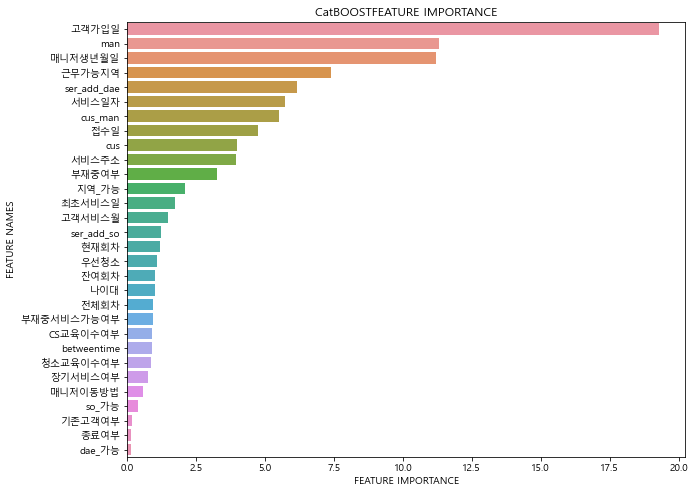

In [8]:
# Feature Importance
plot_feature_importance(catf.get_feature_importance(), X[cat_list].columns,'CatBOOST')

In [10]:
# Submission
sub = pd.read_csv("data/sample_submission_final.csv")
pred_tr = catf.predict_proba(test_na[cat_list])
sub["pred"] = pd.DataFrame(pred_tr)[1]

sub.to_csv("sota_test_2.csv",index = False)